### DataProcessing.py

In [ ]:
import pandas as pd

if __name__ == "__main__":
    '''
    '''
    source=pd.read_excel('../data/total.xlsx')
    data=pd.DataFrame(source.values)

    # --- Min-Max Normalization ---
    for i in range(12):
        data.loc[:,i]=(data.loc[:,i]-data.loc[:,i].min())/(data.loc[:,i].max()-data.loc[:,i].min())

    x,y=data.shape
    train_data=data.loc[:int(x*0.8),:]
    test_data=data.loc[int(x*0.8):,:]

    train_data.to_excel('../data/train_data.xlsx',index=False)
    test_data.to_excel('../data/test_data.xlsx',index=False)
    data.to_excel('../data/handle.xlsx',index=False)

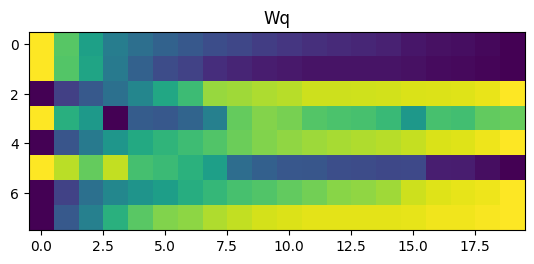

In [7]:
# import pandas as pd
# import matplotlib.pyplot as plt

# if __name__ == "__main__":
#     '''
#     '''
#     data=pd.read_csv('../data/result/WQ.txt')
#     data=data.values.T

#     # for i in range(12):
#     #     data.loc[:,i]=(data.loc[:,i]-data.loc[:,i].min())/(data.loc[:,i].max()-data.loc[:,i].min())
#     # --- Min-Max Normalization ---
#     for i in range(len(data)):
#         min_val = data[i].min()
#         max_val = data[i].max()
        
#         # data[i] = (data[i] - min_val) / (max_val - min_val)
#     # data=data.values
#     # plt.imshow(data)
#     # plt.title('Wq')

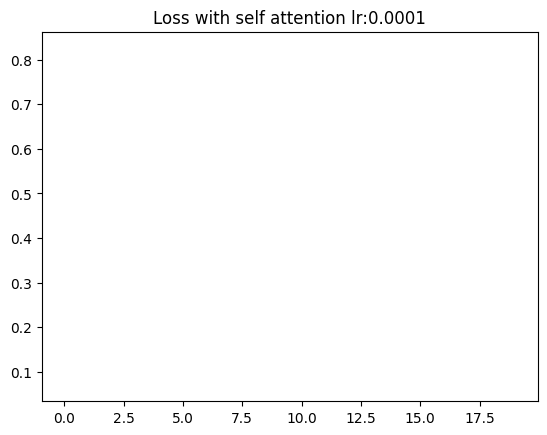

In [34]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
if __name__ == "__main__":
    fig = plt.figure()
    plt.title('Loss with self attention lr:0.0001')
    ims = []
    X=[]
    x=[0.825105
,  0.385919
,  0.224624
,  0.160336
,  0.126073
,  0.107923
,  0.094480
,  0.087892
,  0.082446
,  0.080087
,  0.078556
,  0.076952
,  0.075852
,  0.074495
,  0.073537
,  0.073048
,  0.072378
,  0.072249
,  0.071930
,  0.071832]
    for i in range(len(x)):
        X.append(x[i])
        im=plt.plot(X)
        # im = plt.plot(np.linspace(0, i,10), np.linspace(0, np.random.randint(i),10))
        ims.append(im)
    ani = animation.ArtistAnimation(fig, ims, interval=200, repeat_delay=1000)
    ani.save("../data/result/loss.gif",writer='pillow')


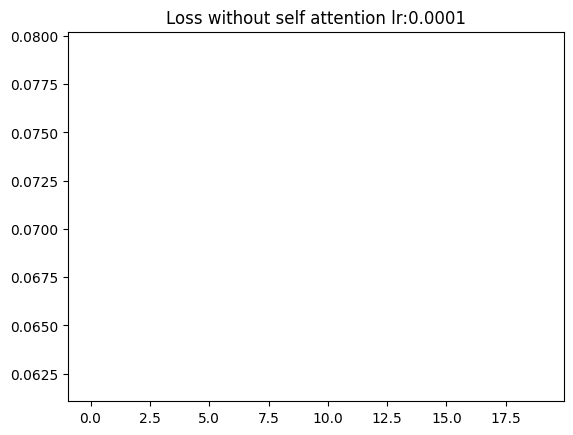

In [35]:

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
if __name__ == "__main__":
    fig = plt.figure()
    plt.title('Loss without self attention lr:0.0001')
    ims = []
    X=[]
    x=[
0.079346
,0.078584
,0.078137
,0.078373
,0.077996
,0.077220
,0.074903
,0.070784
,0.065776
,0.063646
,0.062718
,0.062450
,0.062388
,0.062284
,0.061944
,0.061954
,0.062129
,0.062226
,0.062178
,0.062017]
    for i in range(len(x)):
        X.append(x[i])
        im=plt.plot(X)
        # im = plt.plot(np.linspace(0, i,10), np.linspace(0, np.random.randint(i),10))
        ims.append(im)
    ani = animation.ArtistAnimation(fig, ims, interval=200, repeat_delay=1000)
    ani.save("../data/result/loss.gif",writer='pillow')


In [ ]:
# import torch
# from torch import nn
# from DEP import getData
# from DEP import dataIter
# from DEP import relu
# from DEP import sgd
# from DEP import squareLoss as loss

# def net(X,kernel,WQ,WK,WV,W1,b1,W2,b2):
#     '''
    
#     '''
#     # --- Self Attention ---
#     I=X.sin()

#     Q=WQ*I
#     K=WK*I
#     V=WV*I

#     A=K.t()@Q
#     softmax=nn.Softmax(dim=1)
#     Ax=softmax(A)
#     O=V@Ax

#     # --- One dime Kernel ---
#     Z=kernel*O

#     # --- Mult Perce ---
#     H = relu(W1@(Z.T) + b1.T)
#     Y=(W2@H + b2.T)

#     return Y

# if __name__ == "__main__":
#     '''

#     '''
    
#     batchSize=4
#     epochSize=10

#     lr=0.01
#     OrigD=8
#     DestD=4
#     HideD=4

#     kernel=nn.Parameter(torch.tensor(1.,requires_grad=True))

#     WQ=nn.Parameter(torch.randn(1,OrigD,requires_grad=True) * 5)
#     WK=nn.Parameter(torch.randn(1,OrigD,requires_grad=True) * 5)
#     WV=nn.Parameter(torch.randn(1,OrigD,requires_grad=True) * 5)

#     W1 = nn.Parameter(torch.randn(HideD, OrigD, requires_grad=True) * 5)
#     b1 = nn.Parameter(torch.zeros(1,HideD, requires_grad=True))
#     W2 = nn.Parameter(torch.randn(DestD, HideD, requires_grad=True) * 5)
#     b2 = nn.Parameter(torch.zeros(1,DestD, requires_grad=True))

#     # --- 数据读取 ---
#     train_features,train_labels,_=getData('../data/train_data.xlsx')
#     test_features,test_labels,_=getData('../data/test_data.xlsx')

#     for epoch in range(epochSize):
#         print(kernel)
#         for X, y in dataIter(batchSize, train_features, train_labels):
#             # --- X和y的小批量损失 ---
#             l = loss(net(X,kernel,WQ,WK,WV,W1,b1,W2,b2), y)
#             # --- 反向传播，计算梯度 ---
#             l.sum().backward()
#             # --- 使用参数的梯度更新参数 ---
#             sgd([kernel,WQ,WK,WV,W1,b1,W2,b2], lr, batchSize)
#         with torch.no_grad():
#             train_l = loss(net(test_features.mean(axis=0),kernel,WQ,WK,WV,W1,b1,W2,b2), test_labels.mean(axis=0))
#             print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

In [5]:
import torch
import time
import numpy as np
from torch import nn
from DEP import Record
from DEP import getData
from DEP import dataIter
from DEP import relu
from DEP import sgd
from DEP import squareLoss as loss

def net(X,WQ,WK,WV,W1,b1,W2,b2):
    '''
    
    '''
    # --- Self Attention ---
    I=X.sin()

    Q=WQ*I
    K=WK*I
    V=WV*I

    A=K.t()@Q
    softmax=nn.Softmax(dim=1)
    Ax=softmax(A)
    O=V@Ax

    # --- Mult Perce ---
    H = relu(W1@(O.T) + b1.T)
    Y=(W2@H + b2.T)

    return Y

if __name__ == "__main__":
    '''

    '''
    batchSize=8
    epochSize=20

    lr=0.0001
    OrigD=8
    DestD=4
    HideD=4

    WQ=nn.Parameter(torch.randn(1,OrigD,requires_grad=True) * 5)
    WK=nn.Parameter(torch.randn(1,OrigD,requires_grad=True) * 5)
    WV=nn.Parameter(torch.randn(1,OrigD,requires_grad=True) * 5)

    W1 = nn.Parameter(torch.randn(HideD, OrigD, requires_grad=True) * 5)
    b1 = nn.Parameter(torch.zeros(1,HideD, requires_grad=True))
    W2 = nn.Parameter(torch.randn(DestD, HideD, requires_grad=True) * 5)
    b2 = nn.Parameter(torch.zeros(1,DestD, requires_grad=True))

    # --- 数据读取 ---
    train_features,train_labels,_=getData('../data/original/train_data.xlsx')
    test_features,test_labels,_=getData('../data/original/test_data.xlsx')
    
    record=Record()
    
    for epoch in range(epochSize):
        for X, y in dataIter(batchSize, train_features, train_labels):
            # --- X和y的小批量损失 ---
            l = loss(net(X,WQ,WK,WV,W1,b1,W2,b2), y)
            # --- 反向传播，计算梯度 ---
            l.sum().backward()
            # --- 使用参数的梯度更新参数 ---
            sgd([WQ,WK,WV,W1,b1,W2,b2], lr, batchSize)
        with torch.no_grad():
            train_l = loss(net(test_features,WQ,WK,WV,W1,b1,W2,b2), test_labels)
            print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
            record.add(train_l.mean())
            record.savePara('../data/result/WQ',WQ.detach().numpy())
    record.saveLoss('../data/result/Loss')

epoch 1, loss 56.503391
epoch 2, loss 45.847069
epoch 3, loss 38.268082
epoch 4, loss 32.728886
epoch 5, loss 30.002962
epoch 6, loss 28.030851
epoch 7, loss 26.889610
epoch 8, loss 24.701431
epoch 9, loss 23.801207
epoch 10, loss 23.123993
epoch 11, loss 22.594009
epoch 12, loss 21.872070
epoch 13, loss 21.541733
epoch 14, loss 21.412552
epoch 15, loss 21.156185
epoch 16, loss 20.594402
epoch 17, loss 20.155470
epoch 18, loss 20.042936
epoch 19, loss 19.706217
epoch 20, loss 19.186716


In [19]:
z=net(test_features,WQ,WK,WV,W1,b1,W2,b2)
z=z.mean(axis=1)
z=z.detach().numpy()

In [17]:
s=test_features.mean(axis=0)

In [5]:
print(WK,WK,WV,W1,b1,W2,b2)

Parameter containing:
tensor([[ 3.0884, -6.4803,  4.9852,  5.9869, -4.8233,  5.7545, -0.2335,  5.9662]],
       requires_grad=True)


In [10]:
feat=torch.tensor([0.95,0.823529412,0,0.8,0.006075657,0.009419246,0.01159108,0.030305886,0.031536561,0.034104969,0.011379024,0.007001902])
z=net(feat,WQ,WK,WV,W1,b1,W2,b2)

RuntimeError: The size of tensor a (8) must match the size of tensor b (12) at non-singleton dimension 1

In [32]:
import pandas as pd

if __name__ == "__main__":
    '''
    '''
    data=pd.read_excel('../data/original/total.xlsx')
    data=data.values
    data=data.T
    X=[]
    x=[5.8719344139,-1.777615428,0.4720406532,-2.4528055191,0.1816388369,0.1899358183,0.1815485954,0.158750385,0.2116764486,0.2287368923,0.2194380611,0.2153886408]
    # --- Min-Max Normalization ---
    for i in range(len(x)):
        min_val = data[i].min()
        max_val = data[i].max()
        s=x[i]*(max_val-min_val)+min_val
        X.append(s)
    print(X)

[214.877376556, -2.7219462276, 54148.562400058596, -83.584165573, 43477.61830034481, 43457.85276147312, 44365.42502117679, 41043.5853327393, 59299.41342418208, 64157.78546178384, 63085.23308641106, 58906.85052206694]


In [31]:

min_val=data[0].min()
max_val=data[0].max()
s=5.8719344139*(max_val-min_val)+min_val
print(s,min_val,max_val)

214.877376556 -20.0 20.0


In [33]:
h=torch.tensor([18,0.5,95461.3,8,92637.25193,91024.04597,92936.14641,97118.21165,98728.95406,94766.4384,87583.37797,92217.74637])


In [36]:
m = nn.Conv1d(in_channels=16, out_channels=33, kernel_size=3, stride=2)

input = torch.randn(20, 16, 50) # batch size 20,通道数16,序列长度50
output = m(input) # 卷积输出